In [1]:
#! pip install pandas numpy matplotlib scikit-learn mlxtend keras



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Introduction

### Load Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.utils import to_categorical

### Load Data

In [3]:
data = pd.read_csv('https://github.com/unclethien/Facial-Expression-Recognition/raw/main/Dataset/icml_face_data.csv')
data.head()

### Overview

In [ ]:
data[' Usage'].value_counts()

 Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

### Prepare Data

In [ ]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

Define training, validation and test data:

In [ ]:
# Prepare data for modeling 
# input: data frame with labels und pixel data
# output: image and label array

def prepare_data(data):
    """ Prepare data for modeling 
        input: data frame with labels und pixel data
        output: image and label array """
    
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, ' pixels'], dtype=int, sep=' ')
        image = np.reshape(image, ( 48, 48))
        image_array[i] = image
        
    return image_array, image_label

In [ ]:
train_image_array, train_image_label = prepare_data(data[data[' Usage']=='Training'])
val_image_array, val_image_label = prepare_data(data[data[' Usage']=='PrivateTest'])
test_image_array, test_image_label = prepare_data(data[data[' Usage']=='PublicTest'])

UsageError: Line magic function `%` not found.


Reshape and scale the image:

In [ ]:
train_images = train_image_array.reshape((train_image_array.shape[0],  48, 48, 1))
train_images = train_images.astype('float32')/255
val_images = val_image_array.reshape((val_image_array.shape[0], 48, 48, 1))
val_images = val_images.astype('float32')/255
test_images = test_image_array.reshape((test_image_array.shape[0], 48, 48, 1))
test_images = test_images.astype('float32')/255

ValueError: cannot reshape array of size 1440502784 into shape (28709,224,224,3)

Encoding of the target value:

In [ ]:
train_labels = to_categorical(train_image_label)
val_labels = to_categorical(val_image_label)
test_labels = to_categorical(test_image_label)

In [ ]:
# Plot example image for each emotion
def plot_all_emotions():
    fig, axs = plt.subplots(1, 7, figsize=(30, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(7):
        idx = data[data['emotion']==i].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

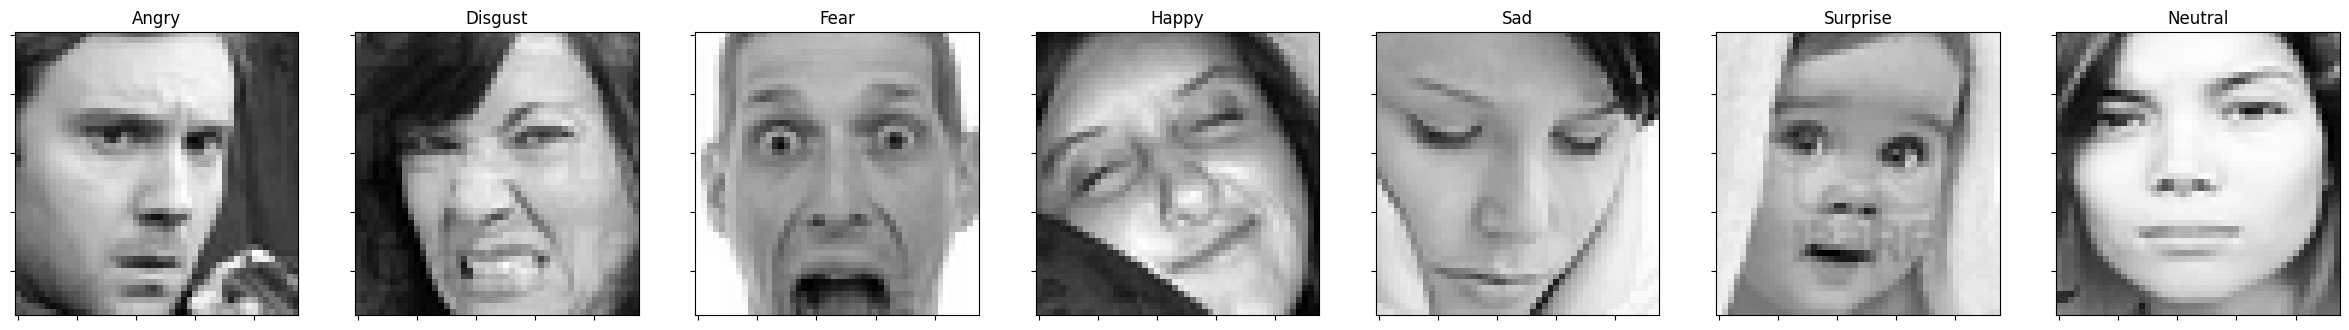

In [ ]:
plot_all_emotions()

### Example Emotions

In [ ]:
#Plot 5 examples of one emotion
def plot_examples(label=0):
    fig, axs = plt.subplots(1, 5, figsize=(30, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(5):
        idx = data[data['emotion']==label].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

#### Angry

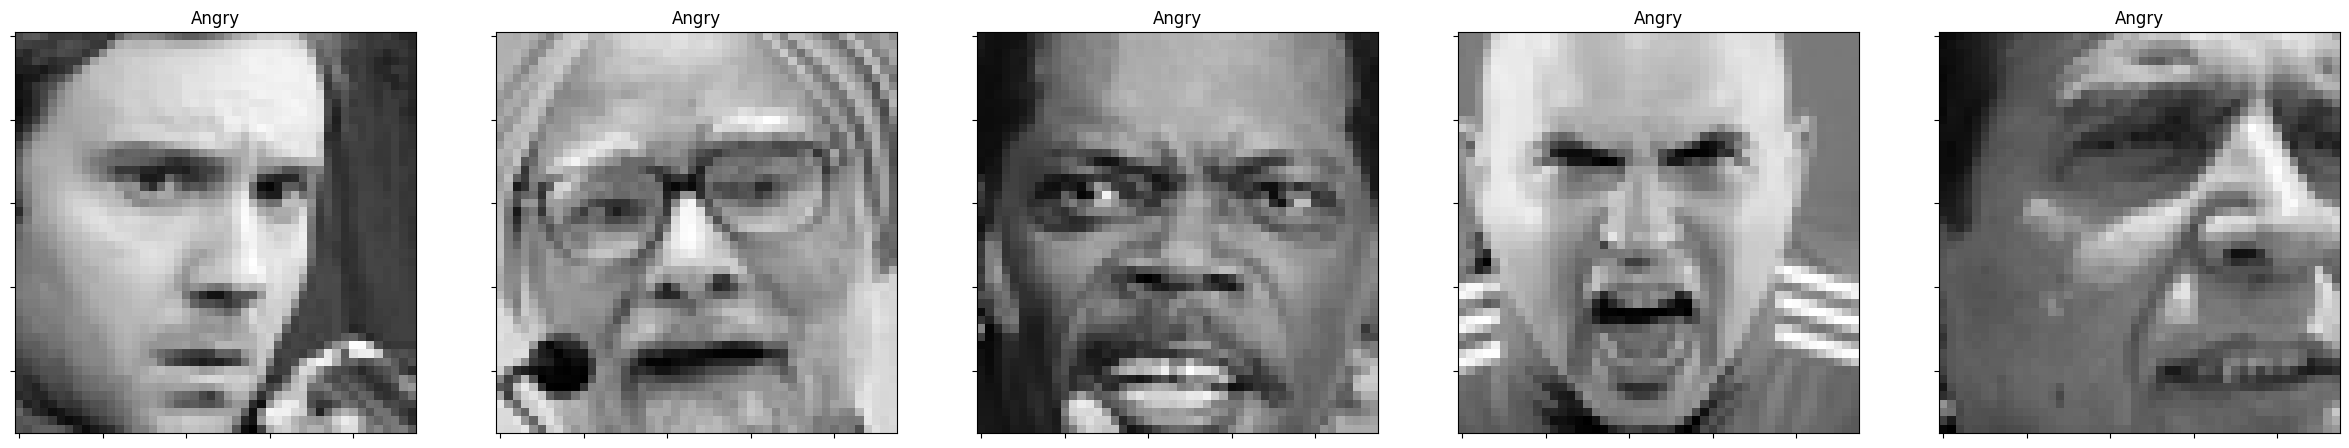

In [ ]:
plot_examples(label=0)

#### Digust

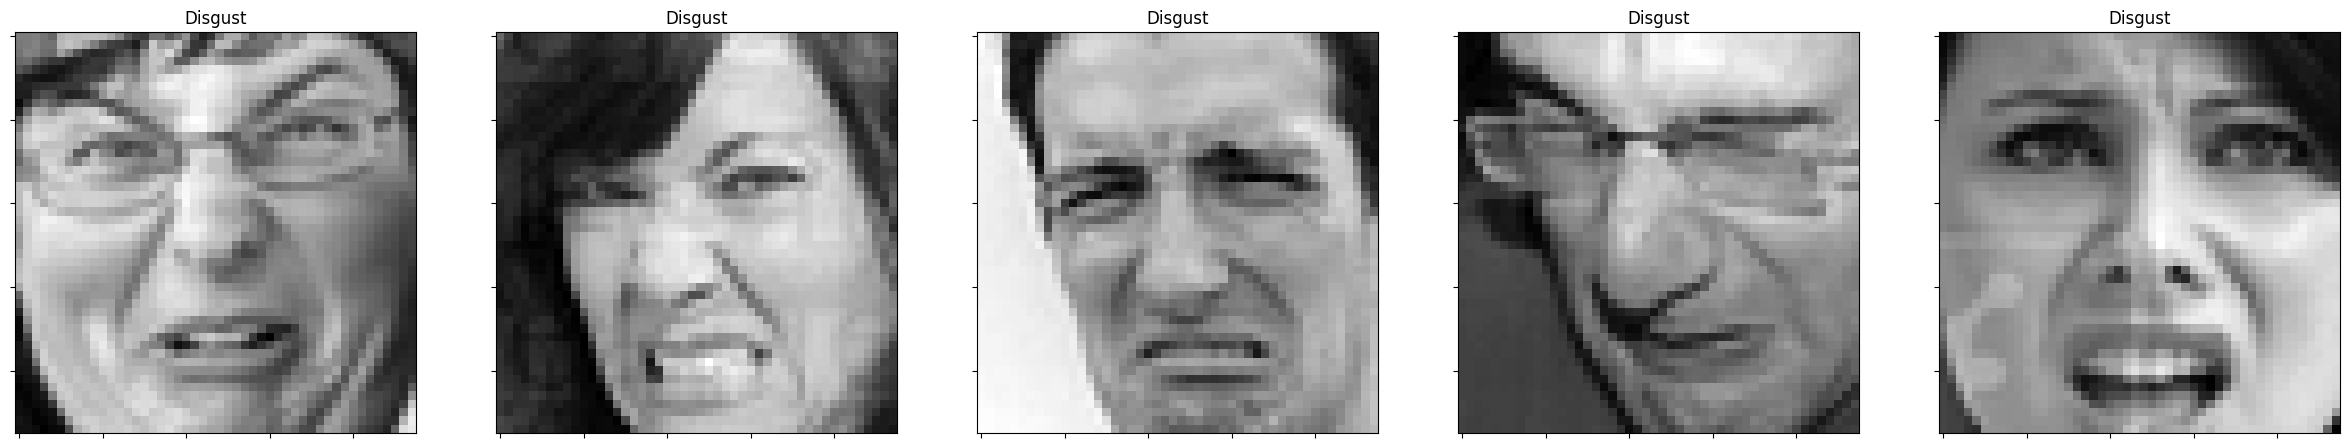

In [ ]:
plot_examples(label=1)

#### Fear

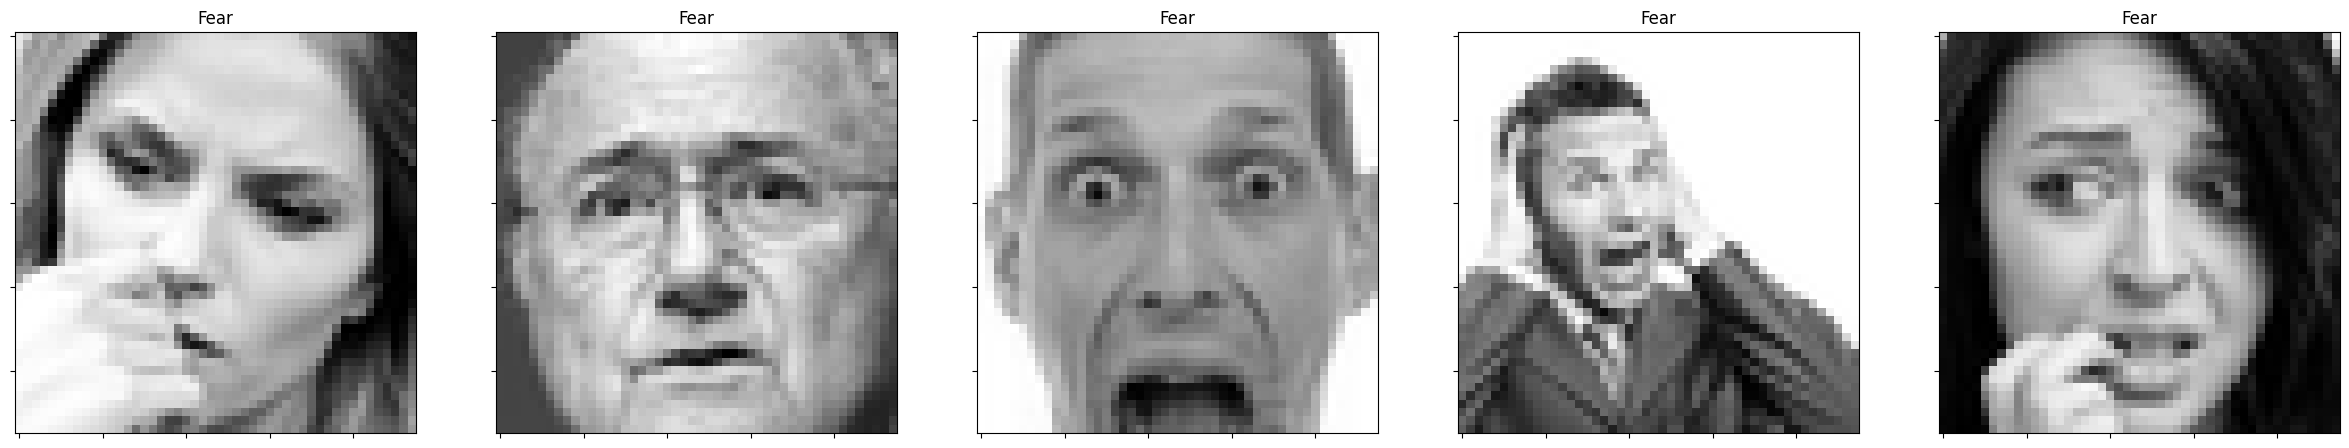

In [ ]:
plot_examples(label=2)

#### Happy

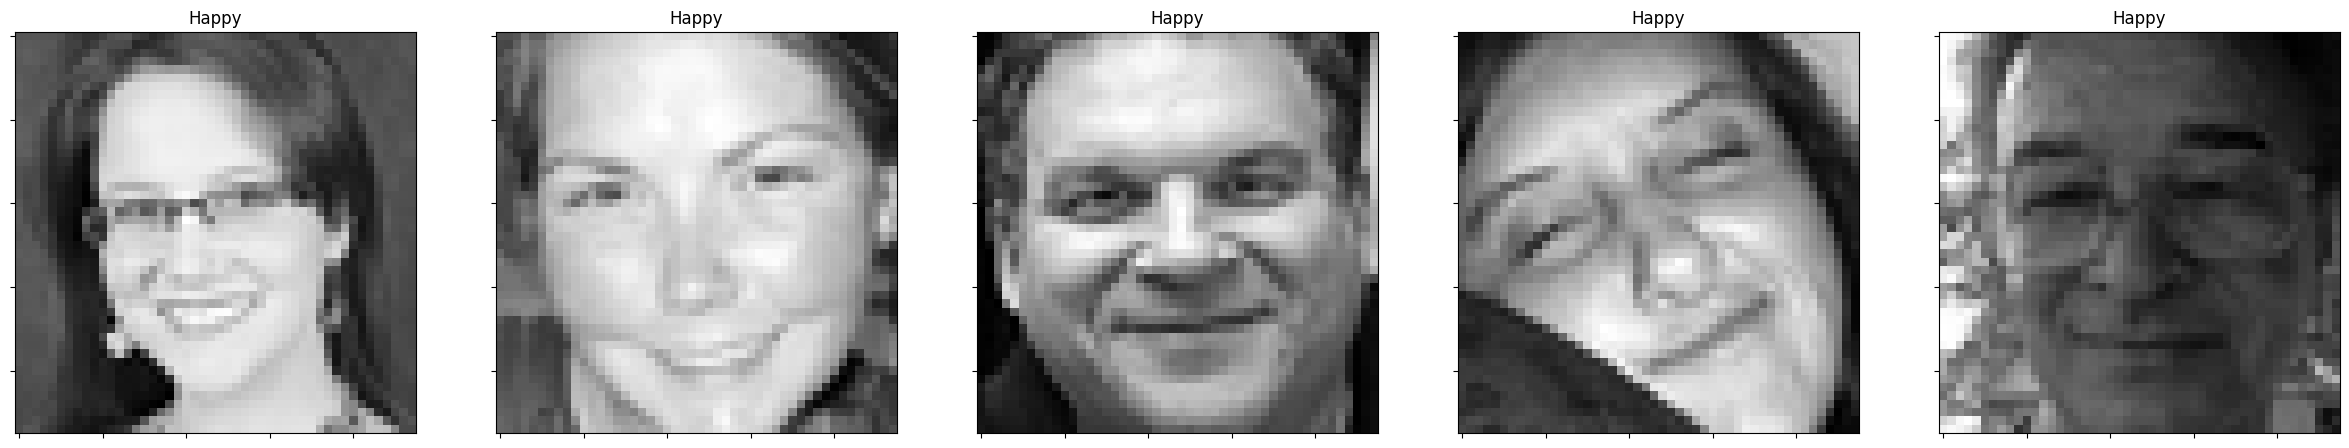

In [ ]:
plot_examples(label=3)

#### Sad

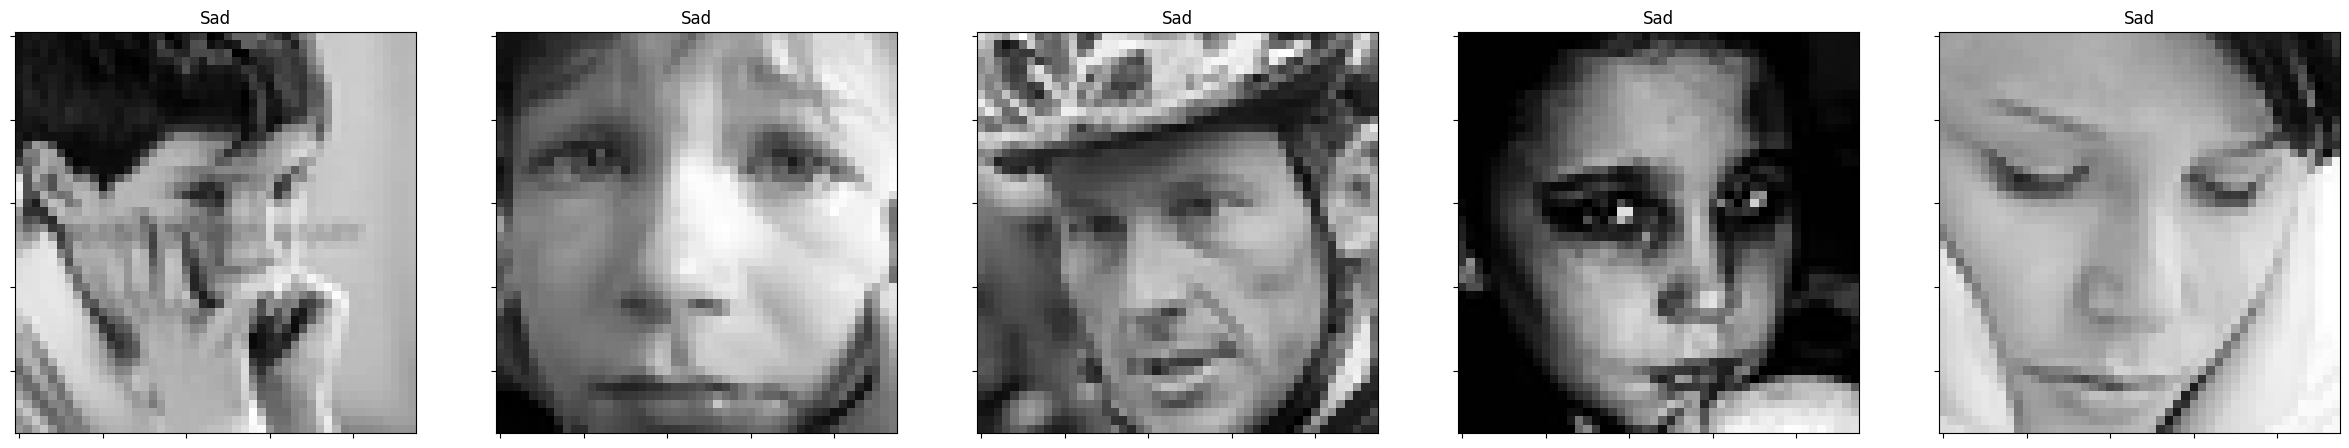

In [ ]:
plot_examples(label=4)

#### Surprise

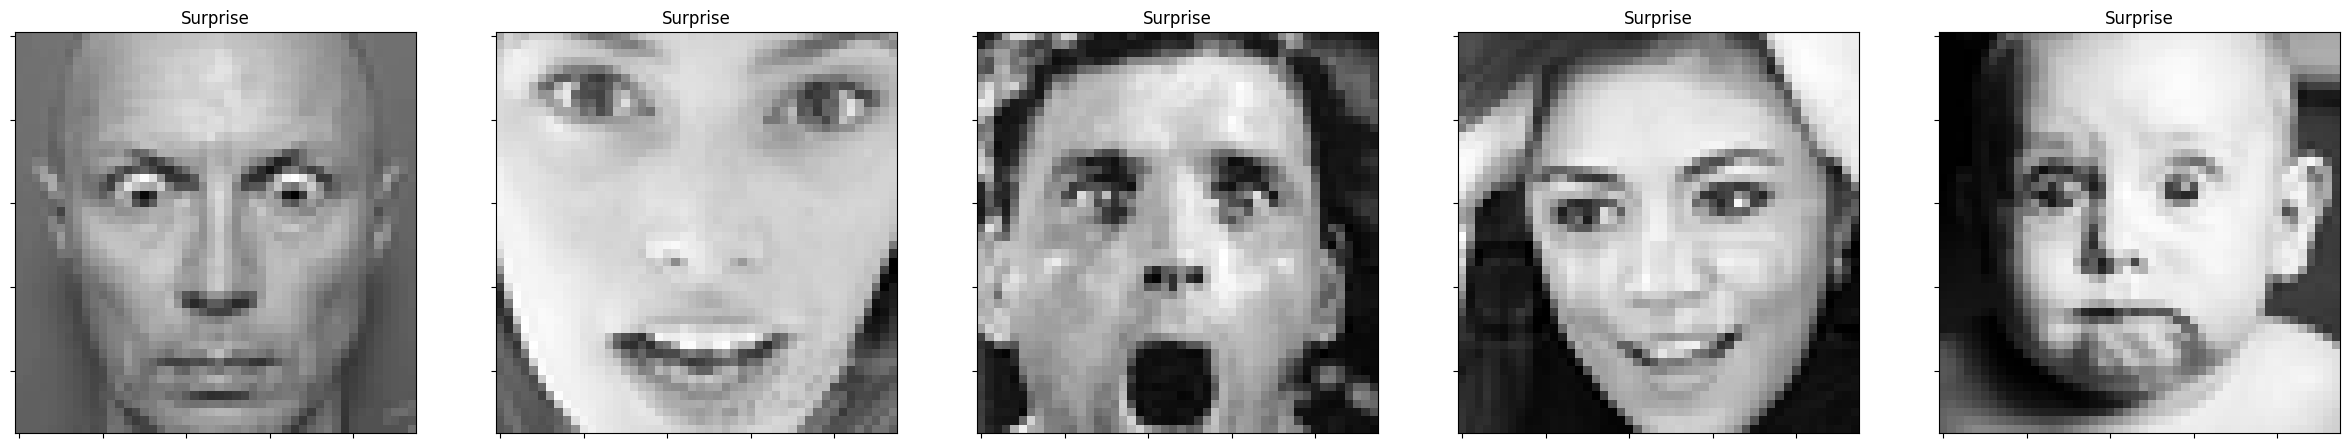

In [ ]:
plot_examples(label=5)

#### Neutral

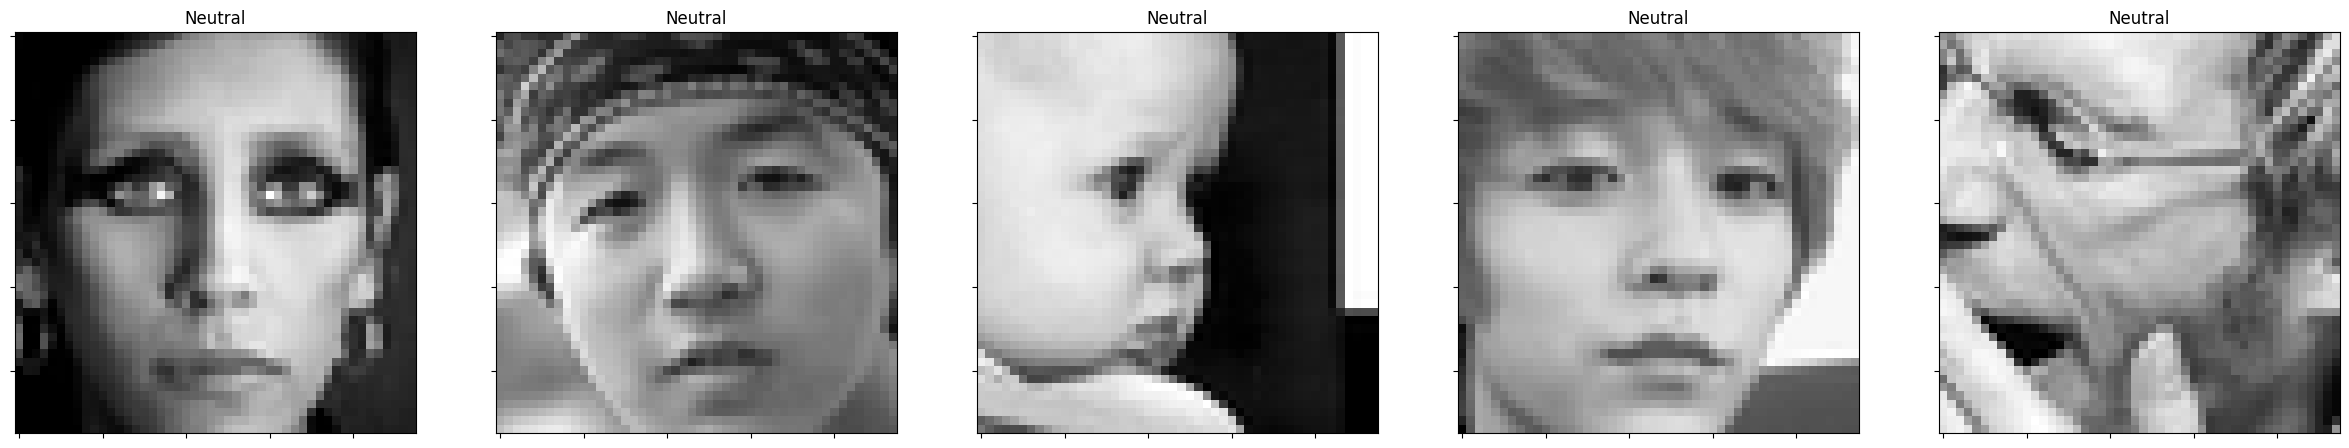

In [ ]:
plot_examples(label=6)

### Distribute of labels

In [ ]:
# plot compare distribution of each emotions in train, val and test data
def plot_compare_distributions(array1, array2, title1='', title2=''):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1['emotion'] = array1.argmax(axis=1)
    df_array2['emotion'] = array2.argmax(axis=1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()
    
    y = df_array1['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color='orange')
    axs[0].set_title(title1)
    axs[0].grid()
    
    y = df_array2['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()
    
    plt.show()

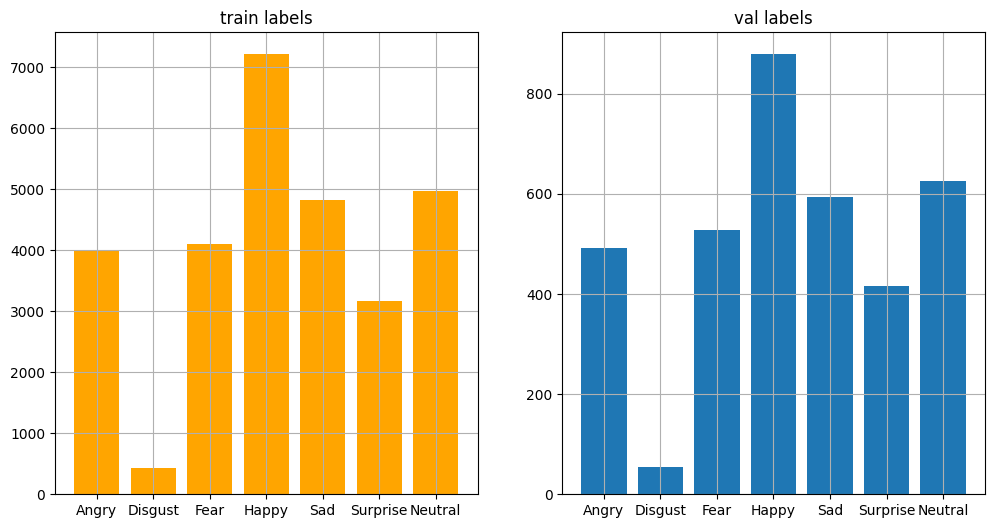

In [ ]:
plot_compare_distributions(train_labels, val_labels, title1='train labels', title2='val labels')

#### Emotion Weights

In [ ]:
class_weight = dict(zip(range(0, 7), (((data[data[' Usage']=='Training']['emotion'].value_counts()).sort_index())/len(data[data[' Usage']=='Training']['emotion'])).tolist()))
#pie chart



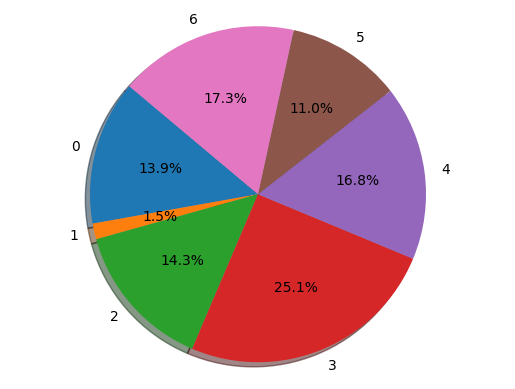

In [ ]:
plt.pie(class_weight.values(), labels=class_weight.keys(), autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Model

In [ ]:
# define CNN model
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))


In [ ]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

In [ ]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [ ]:
history = model.fit(train_images, train_labels, 
                    epochs=30, batch_size=64, 
                    class_weight=class_weight, 
                    validation_data=(val_images, val_labels),
                    callbacks=[es,mc])

Epoch 1/30
448/449 [============================>.] - ETA: 0s - loss: 0.2079 - accuracy: 0.4859
Epoch 1: accuracy improved from -inf to 0.48588, saving model to best_model.h5
449/449 [==============================] - 26s 58ms/step - loss: 0.2079 - accuracy: 0.4859 - val_loss: 1.3879 - val_accuracy: 0.4851
Epoch 2/30
448/449 [============================>.] - ETA: 0s - loss: 0.1944 - accuracy: 0.5199
Epoch 2: accuracy improved from 0.48588 to 0.51984, saving model to best_model.h5
449/449 [==============================] - 26s 58ms/step - loss: 0.1945 - accuracy: 0.5198 - val_loss: 1.2768 - val_accuracy: 0.5313
Epoch 3/30
448/449 [============================>.] - ETA: 0s - loss: 0.1832 - accuracy: 0.5492
Epoch 3: accuracy improved from 0.51984 to 0.54924, saving model to best_model.h5
449/449 [==============================] - 27s 59ms/step - loss: 0.1831 - accuracy: 0.5492 - val_loss: 1.2745 - val_accuracy: 0.5350
Epoch 4/30
448/449 [============================>.] - ETA: 0s - loss: 

In [ ]:
pred_test_labels = model.predict(test_images)

113/113 [==============================] - 1s 8ms/step


In [ ]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("best_model.h5")

### Analyse Convergence

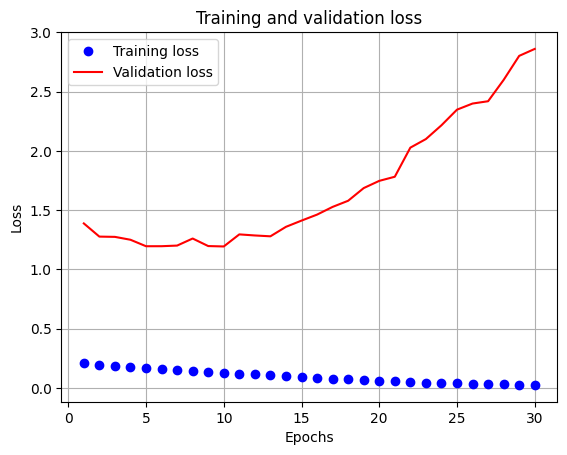

In [ ]:
#plot value of loss fuction
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()
plt.show()


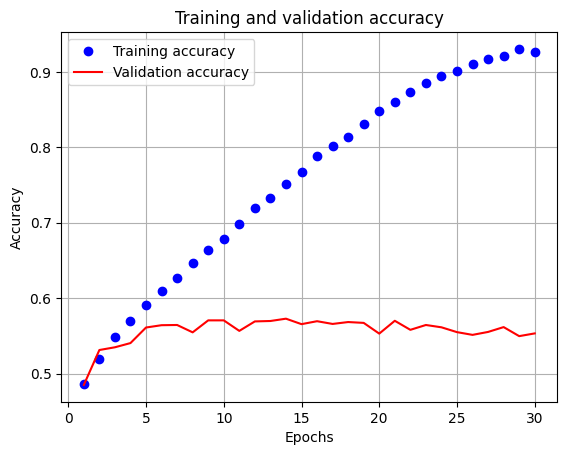

In [ ]:

#plot value of accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()
plt.show()


### Analyse Results

In [ ]:
# Function to plot the image and compare the prediction results with the label
def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    bar_label = emotions.values()

    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])

    axs[1].bar(bar_label, pred_test_labels[image_number], color = 'orange', alpha = 0.7)
    axs[1].grid()
    plt.show()


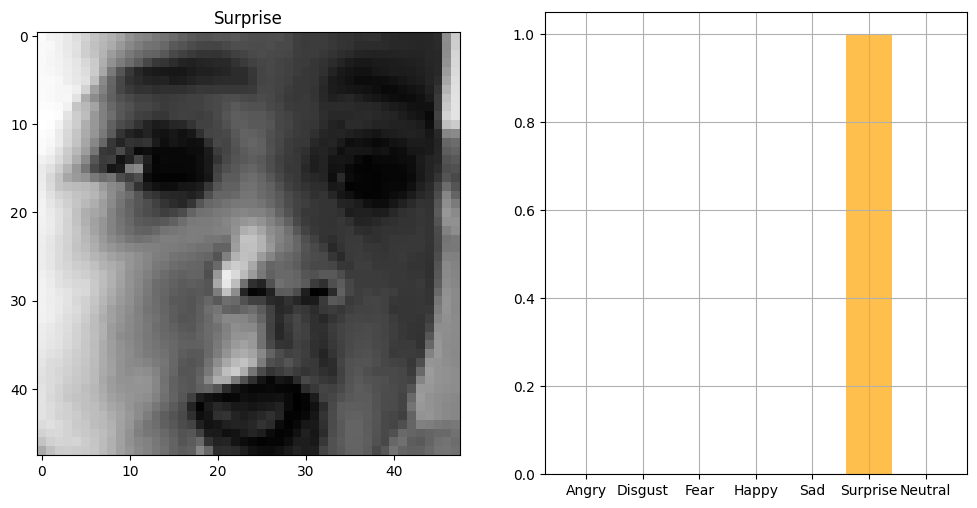

In [ ]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 154)

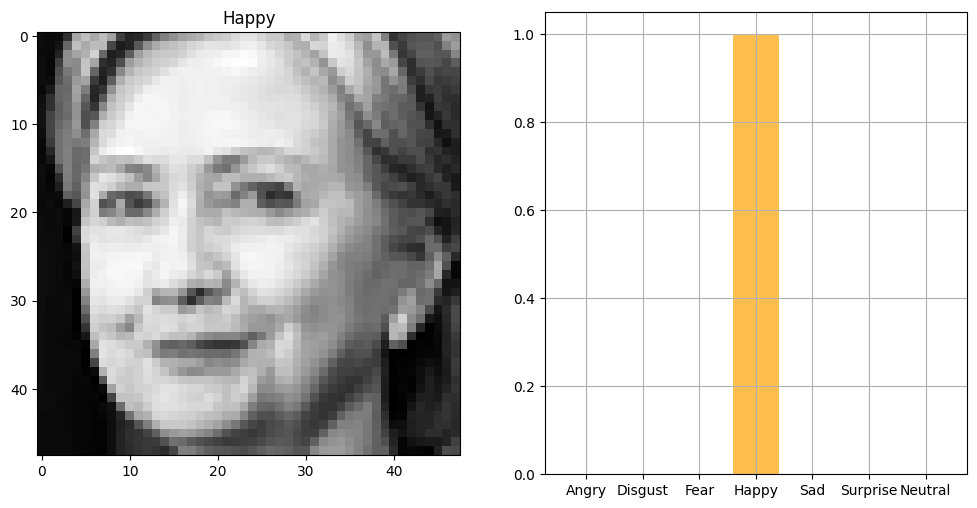

In [ ]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 247)

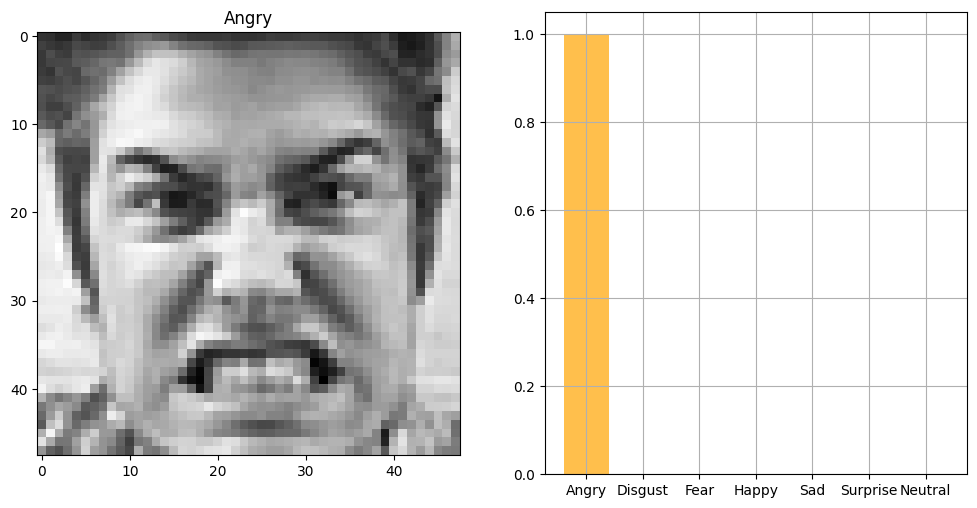

In [ ]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 40)

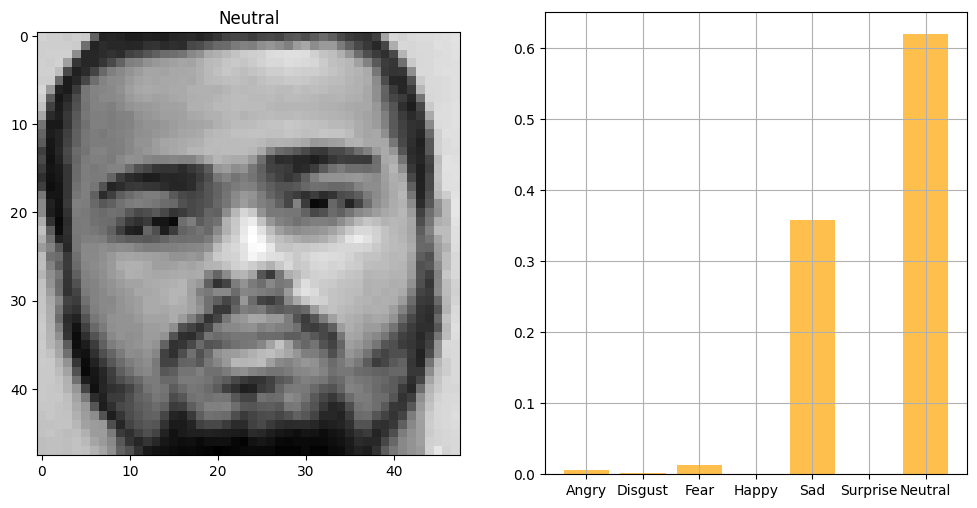

In [ ]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 106)

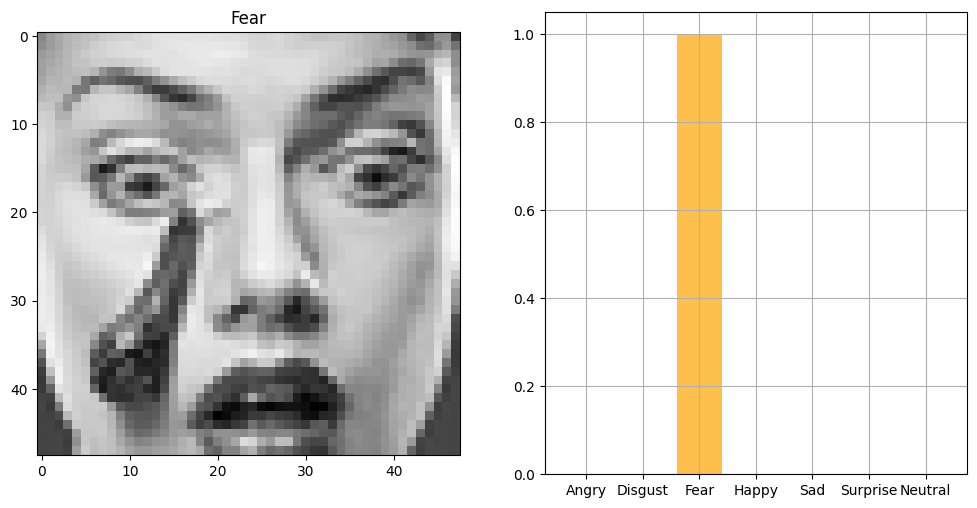

In [ ]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 15)

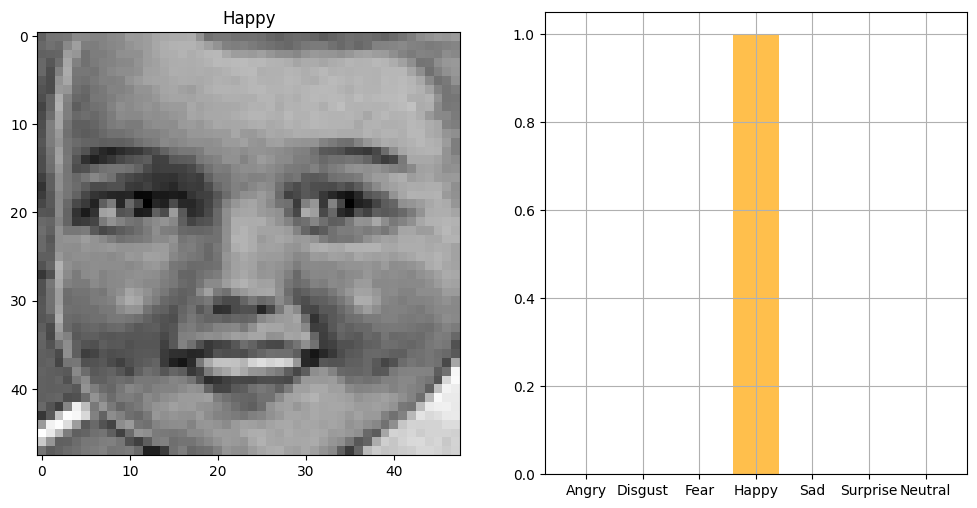

In [ ]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 30)

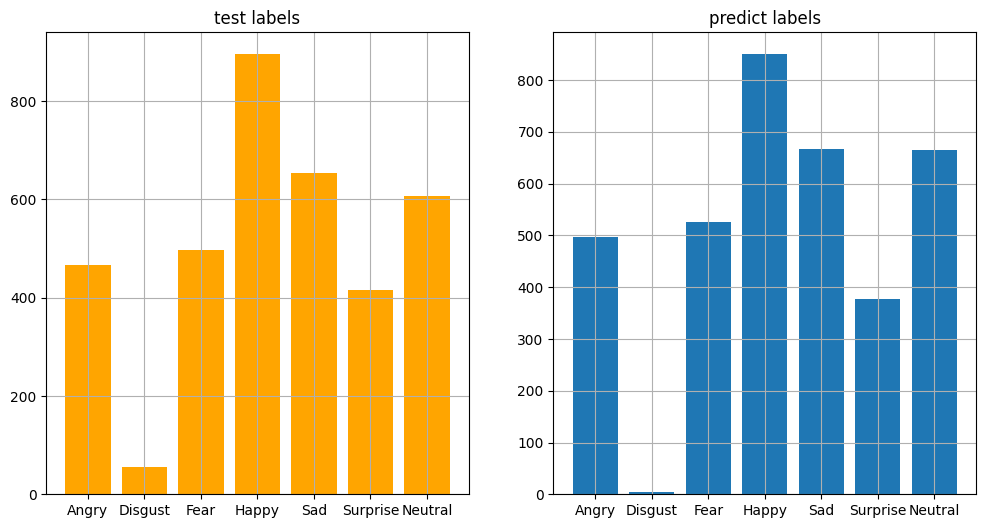

In [ ]:
# Compare distribution of predicted labels with test labels
plot_compare_distributions(test_labels, pred_test_labels, title1='test labels', title2='predict labels')

### Analyse wrong prediction

In [ ]:
df_compare = pd.DataFrame()
df_compare['test_labels'] = test_labels.argmax(axis=1)
df_compare['pred_labels'] = pred_test_labels.argmax(axis=1)
df_compare['wrong'] = np.where(df_compare['test_labels']!=df_compare['pred_labels'], 1, 0)


C:\Users\thien\AppData\Local\Temp\ipykernel_33160\2334260548.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


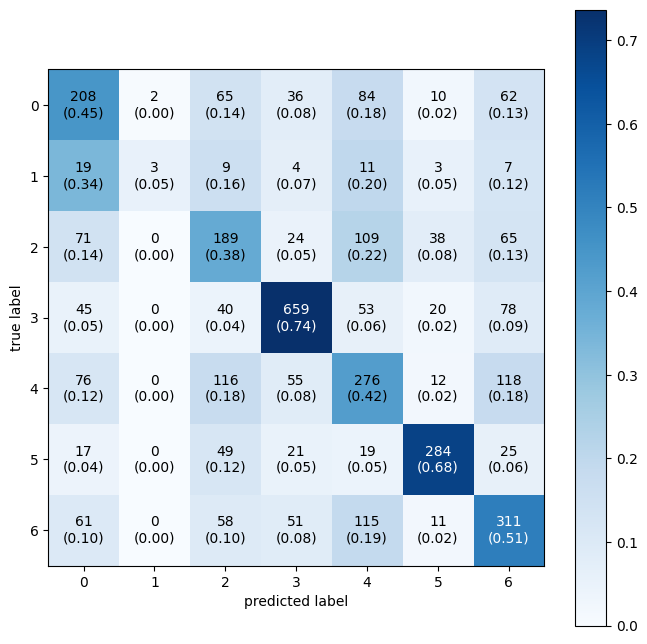

In [ ]:
conf_matrix = confusion_matrix(df_compare['test_labels'], df_compare['pred_labels'])

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix,
                                show_normed=True,
                                figsize=(8,8),
                                colorbar=True)
fig.show()